In [522]:
%%capture
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from eofs.xarray import Eof

In [2]:
open_data = xr.open_dataset('../Data/sst.mnmean.nc')
open_data = open_data.sst
open_data

<xarray.DataArray 'sst' (time: 1981, lat: 89, lon: 180)>
[31735620 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
rgbset2 = np.array([[20,100,210,256],
[30,110,235,256],
[40,130,240,256],
[60,150,245,256],
[80,165,245,256],
[120,185,250,256],
[150,210,250,256],
[180,240,250,256],
[225,255,255,256],
[245,245,245,256],
[255,250,170,256],
[255,232,120,256],
[255,192,60,256],
[255,160,0,256],
[255,96,0,256],
[255,50,0,256],
[225,20,0,256],
[192,0,0,256],
[165,0,0,256]])

rgbset2.shape
newcmp = ListedColormap(rgbset2/256)

In [4]:
clim = open_data.sel(time=slice('1981-01-01','2010-12-31')).groupby('time.month').mean(dim='time')
anom = open_data.groupby('time.month') - clim
anom

/home/grivera/miniconda3/envs/Work/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1981, lat: 89, lon: 180)>
array([[[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,    

In [5]:
ymin = -2.5
ymax = 4
years = mdates.YearLocator(2)
myFmt = mdates.DateFormatter('%Y')

## NIÑO34 index
#### Warm pool el niño?

In [6]:
nino4 = anom.sel(lat=slice(5,-5), lon=slice(160,210))
nino3 = anom.sel(lat=slice(5,-5), lon=slice(210,270))

In [7]:
nino4_mean = nino4.mean(dim=['lat','lon'])
nino4_std = nino4_mean.std()

In [8]:
nino3_mean = nino3.mean(dim=['lat','lon'])
nino3_std = nino3_mean.std()

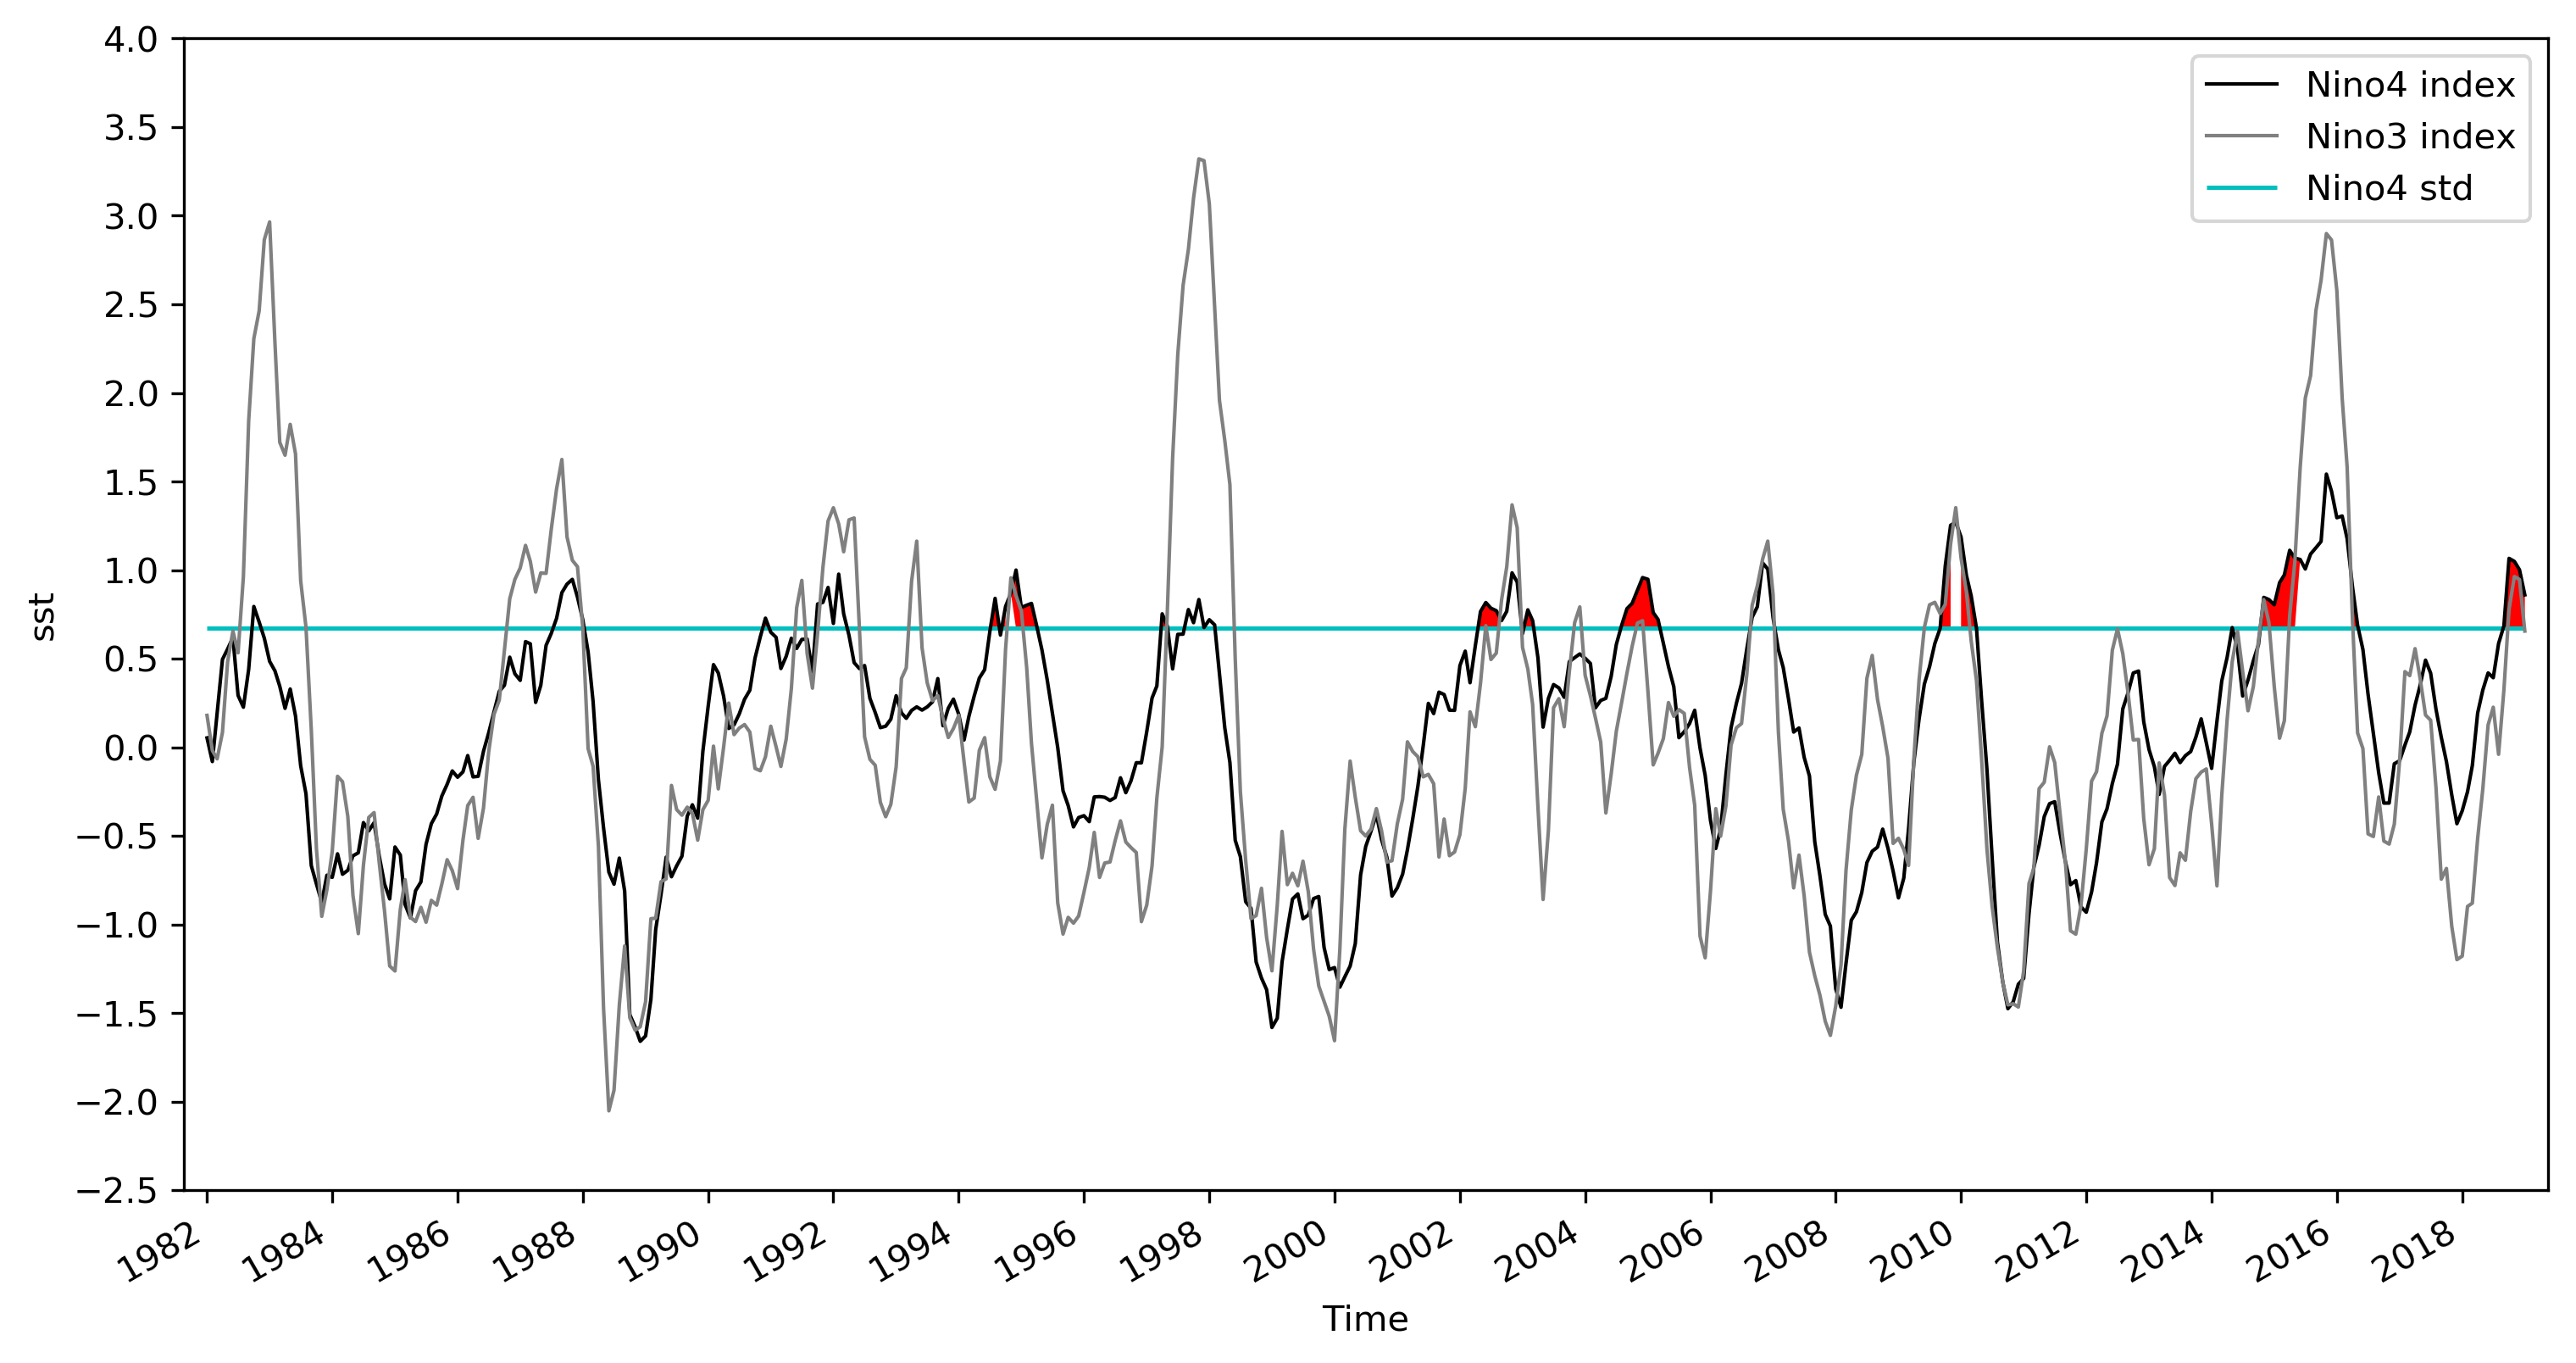

In [10]:
nino4_slice = nino4_mean.sel(time=slice('1982-01-01','2019-12-31'))
nino3_slice = nino3_mean.sel(time=slice('1982-01-01','2019-12-31'))
# plot
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
nino4_slice.plot(ax=ax,c='k',lw=1,label='Nino4 index')
nino3_slice.plot(ax=ax,c='grey',lw=1,label='Nino3 index')
ax.hlines(nino4_std.data,nino4_slice.time.data.min(),nino4_slice.time.data.max(),color='c',lw=1.2,label='Nino4 std')
limit = np.where(nino4_std)
ax.fill_between(nino4_slice.time.data,nino4_slice.data,nino4_std.data,where=(nino4_slice.data>=nino3_slice.data)&(nino4_slice.data>=nino4_std.data),facecolor='red',interpolate=True)
# Ax setup
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)
# Ax lims
ax.set_ylim(ymin,ymax)
ax.set_yticks(np.arange(ymin,ymax+0.1,0.5))
ax.legend()
ax.margins(0.01,0.1)

## El Nino Modoki index (EMI)

In [13]:
c_pacific = anom.sel(lat=slice(10,-10), lon=slice(165,220)).mean(dim=['lat','lon'])
w_pacific = anom.sel(lat=slice(20,-10), lon=slice(125,145)).mean(dim=['lat','lon'])
e_pacific = anom.sel(lat=slice(5,-15), lon=slice(250,290)).mean(dim=['lat','lon'])
EMI = 0.5*w_pacific + 0.5*e_pacific

In [544]:
cstd = EMI_slice.groupby('time.month').std(dim='time')
cstd

<xarray.DataArray 'sst' (month: 12)>
array([0.381903, 0.324525, 0.323714, 0.340127, 0.389075, 0.439326, 0.418413,
       0.396286, 0.381748, 0.378849, 0.416549, 0.44106 ])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [534]:
new_range = pd.date_range('1982-01-01',periods=40*12,freq='MS')
std_clim = xr.Dataset({'cstd':(['time'],np.tile(cstd,40))}, coords={'time':new_range})

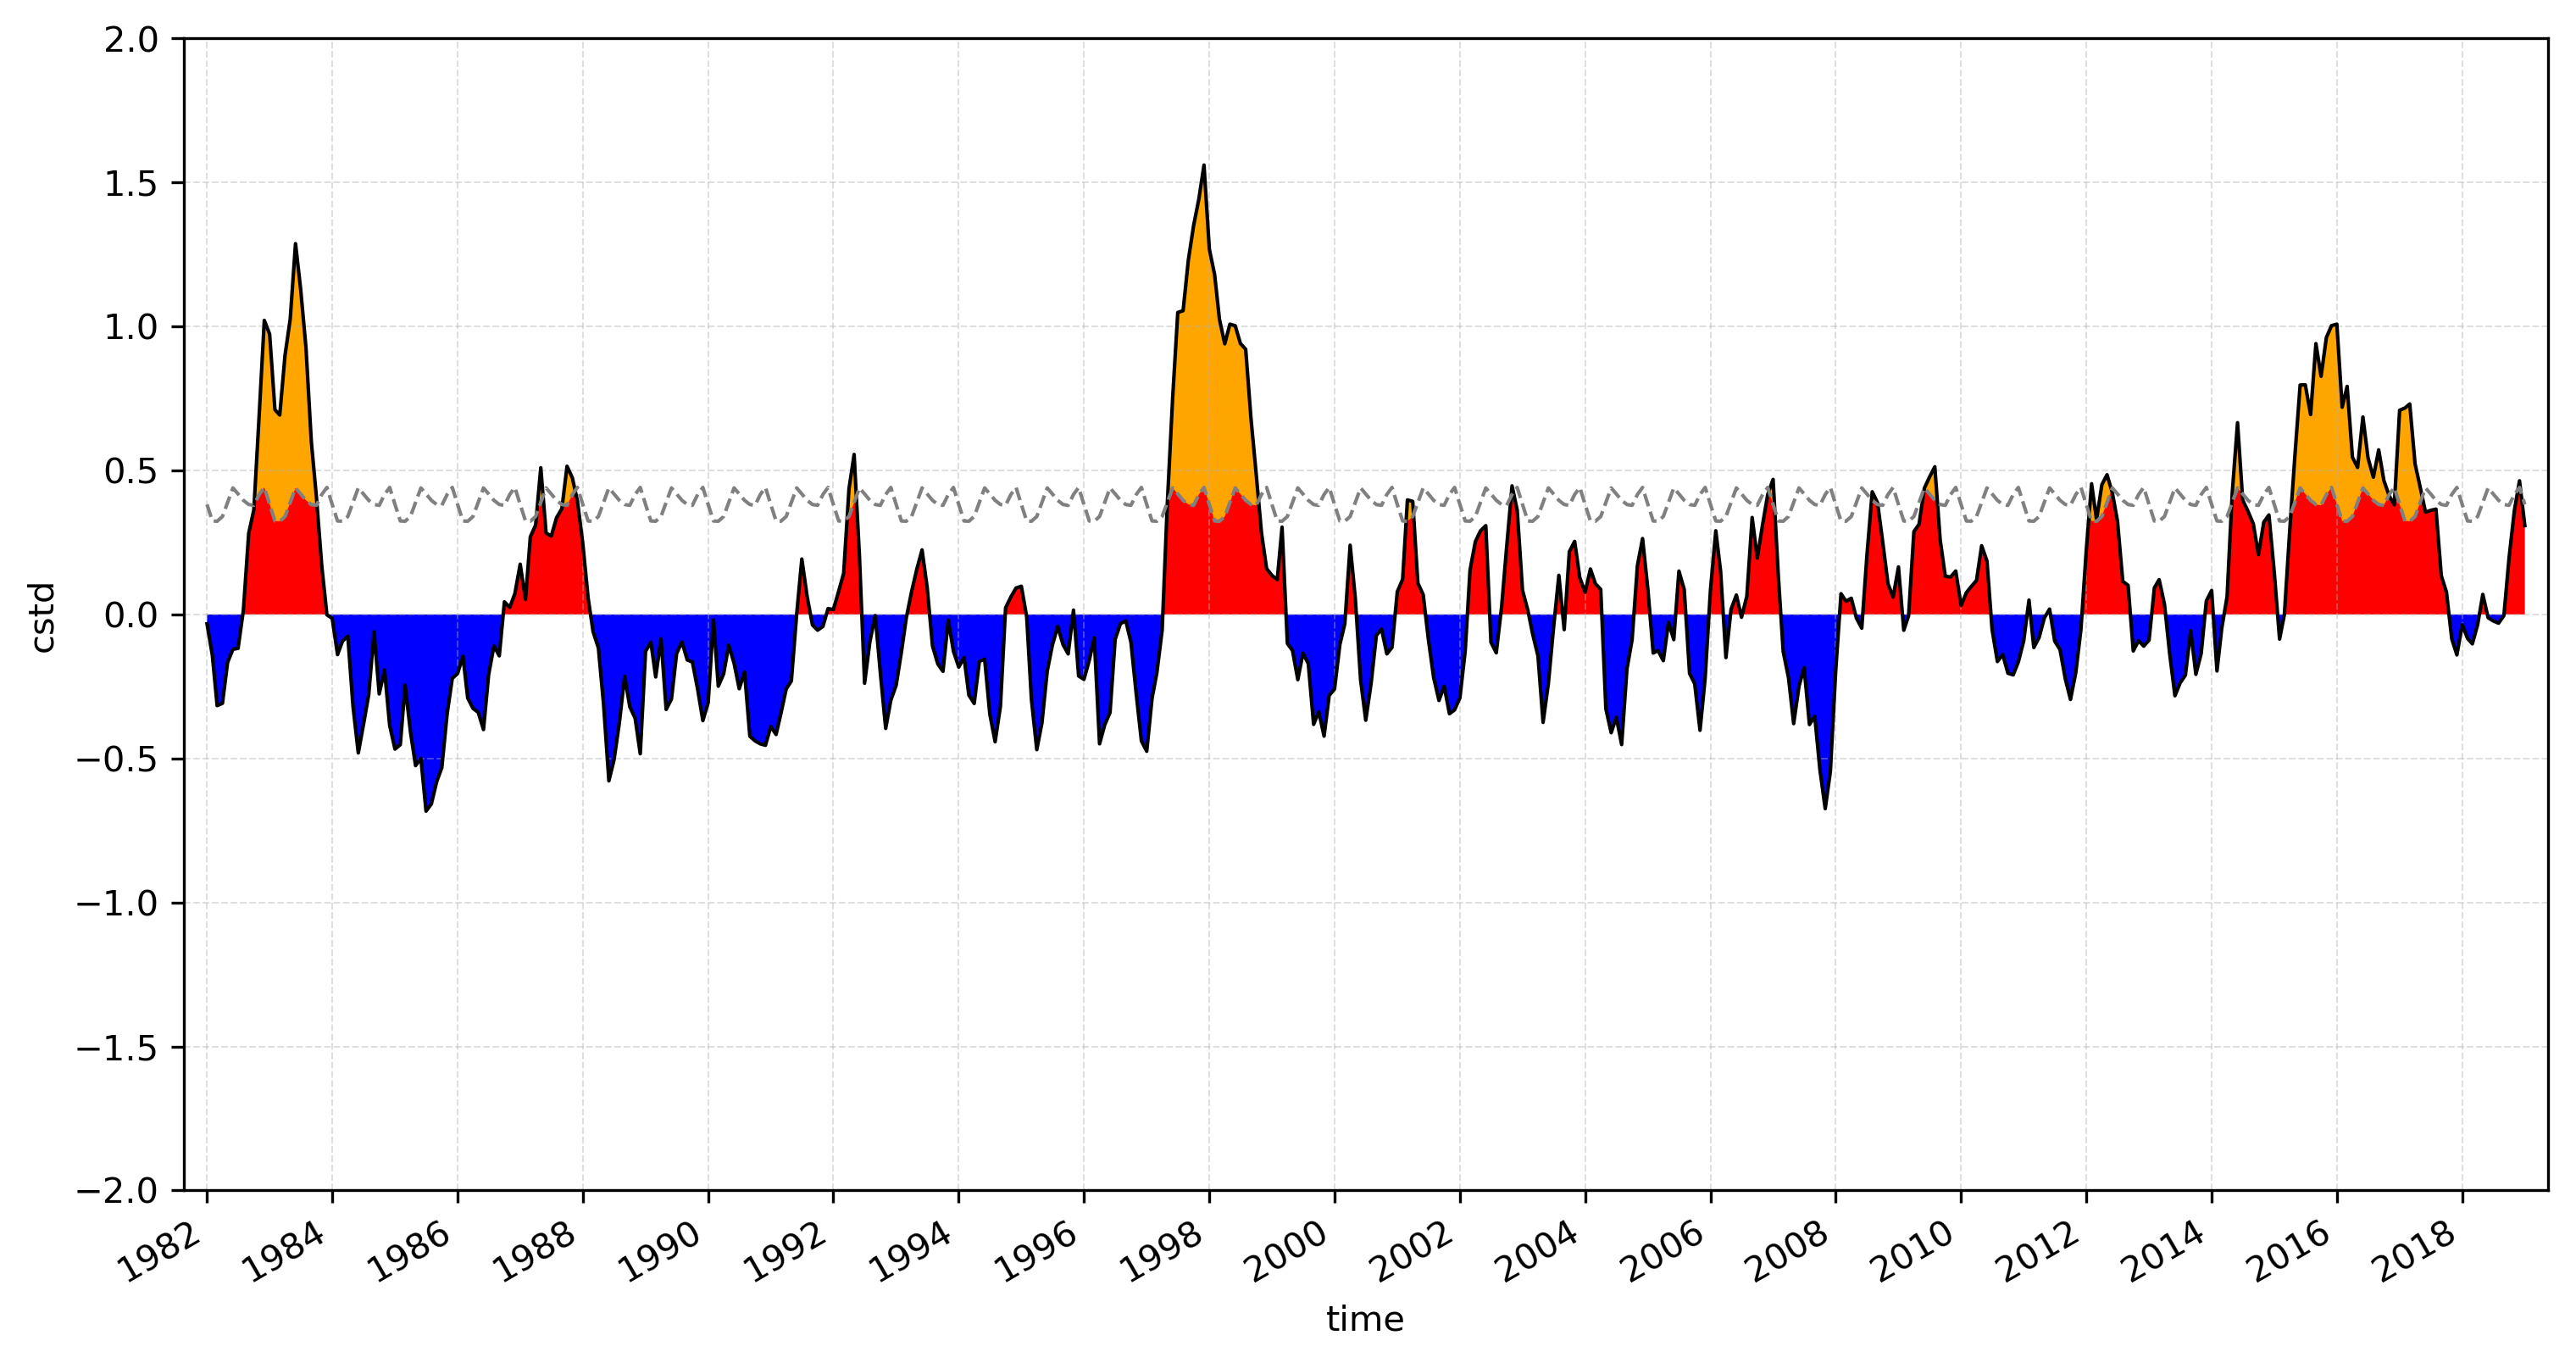

In [555]:
EMI_slice = EMI.sel(time=slice('1982-01-01','2019-12-31'))
std_slice = std_clim.cstd.sel(time=EMI_slice.time)
ymin = -2
ymax = 2
# plot
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data>=0,facecolor='red',interpolate=True)
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data<=0,facecolor='blue',interpolate=True)
EMI_slice.plot(ax=ax,c='k',lw=1)
std_slice.plot(ax=ax,lw=1,c='grey',ls='--')
ax.fill_between(EMI_slice.time.data,EMI_slice.data,std_slice,where=EMI_slice.data>=std_slice,facecolor='orange',interpolate=True)

# Ax setup
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)
# Ax lims
ax.set_ylim(ymin,ymax)
ax.set_yticks(np.arange(ymin,ymax+0.1,0.5))
ax.margins(0.01,0.1)
ax.grid(True,ls='--',lw=0.5,alpha=0.4)

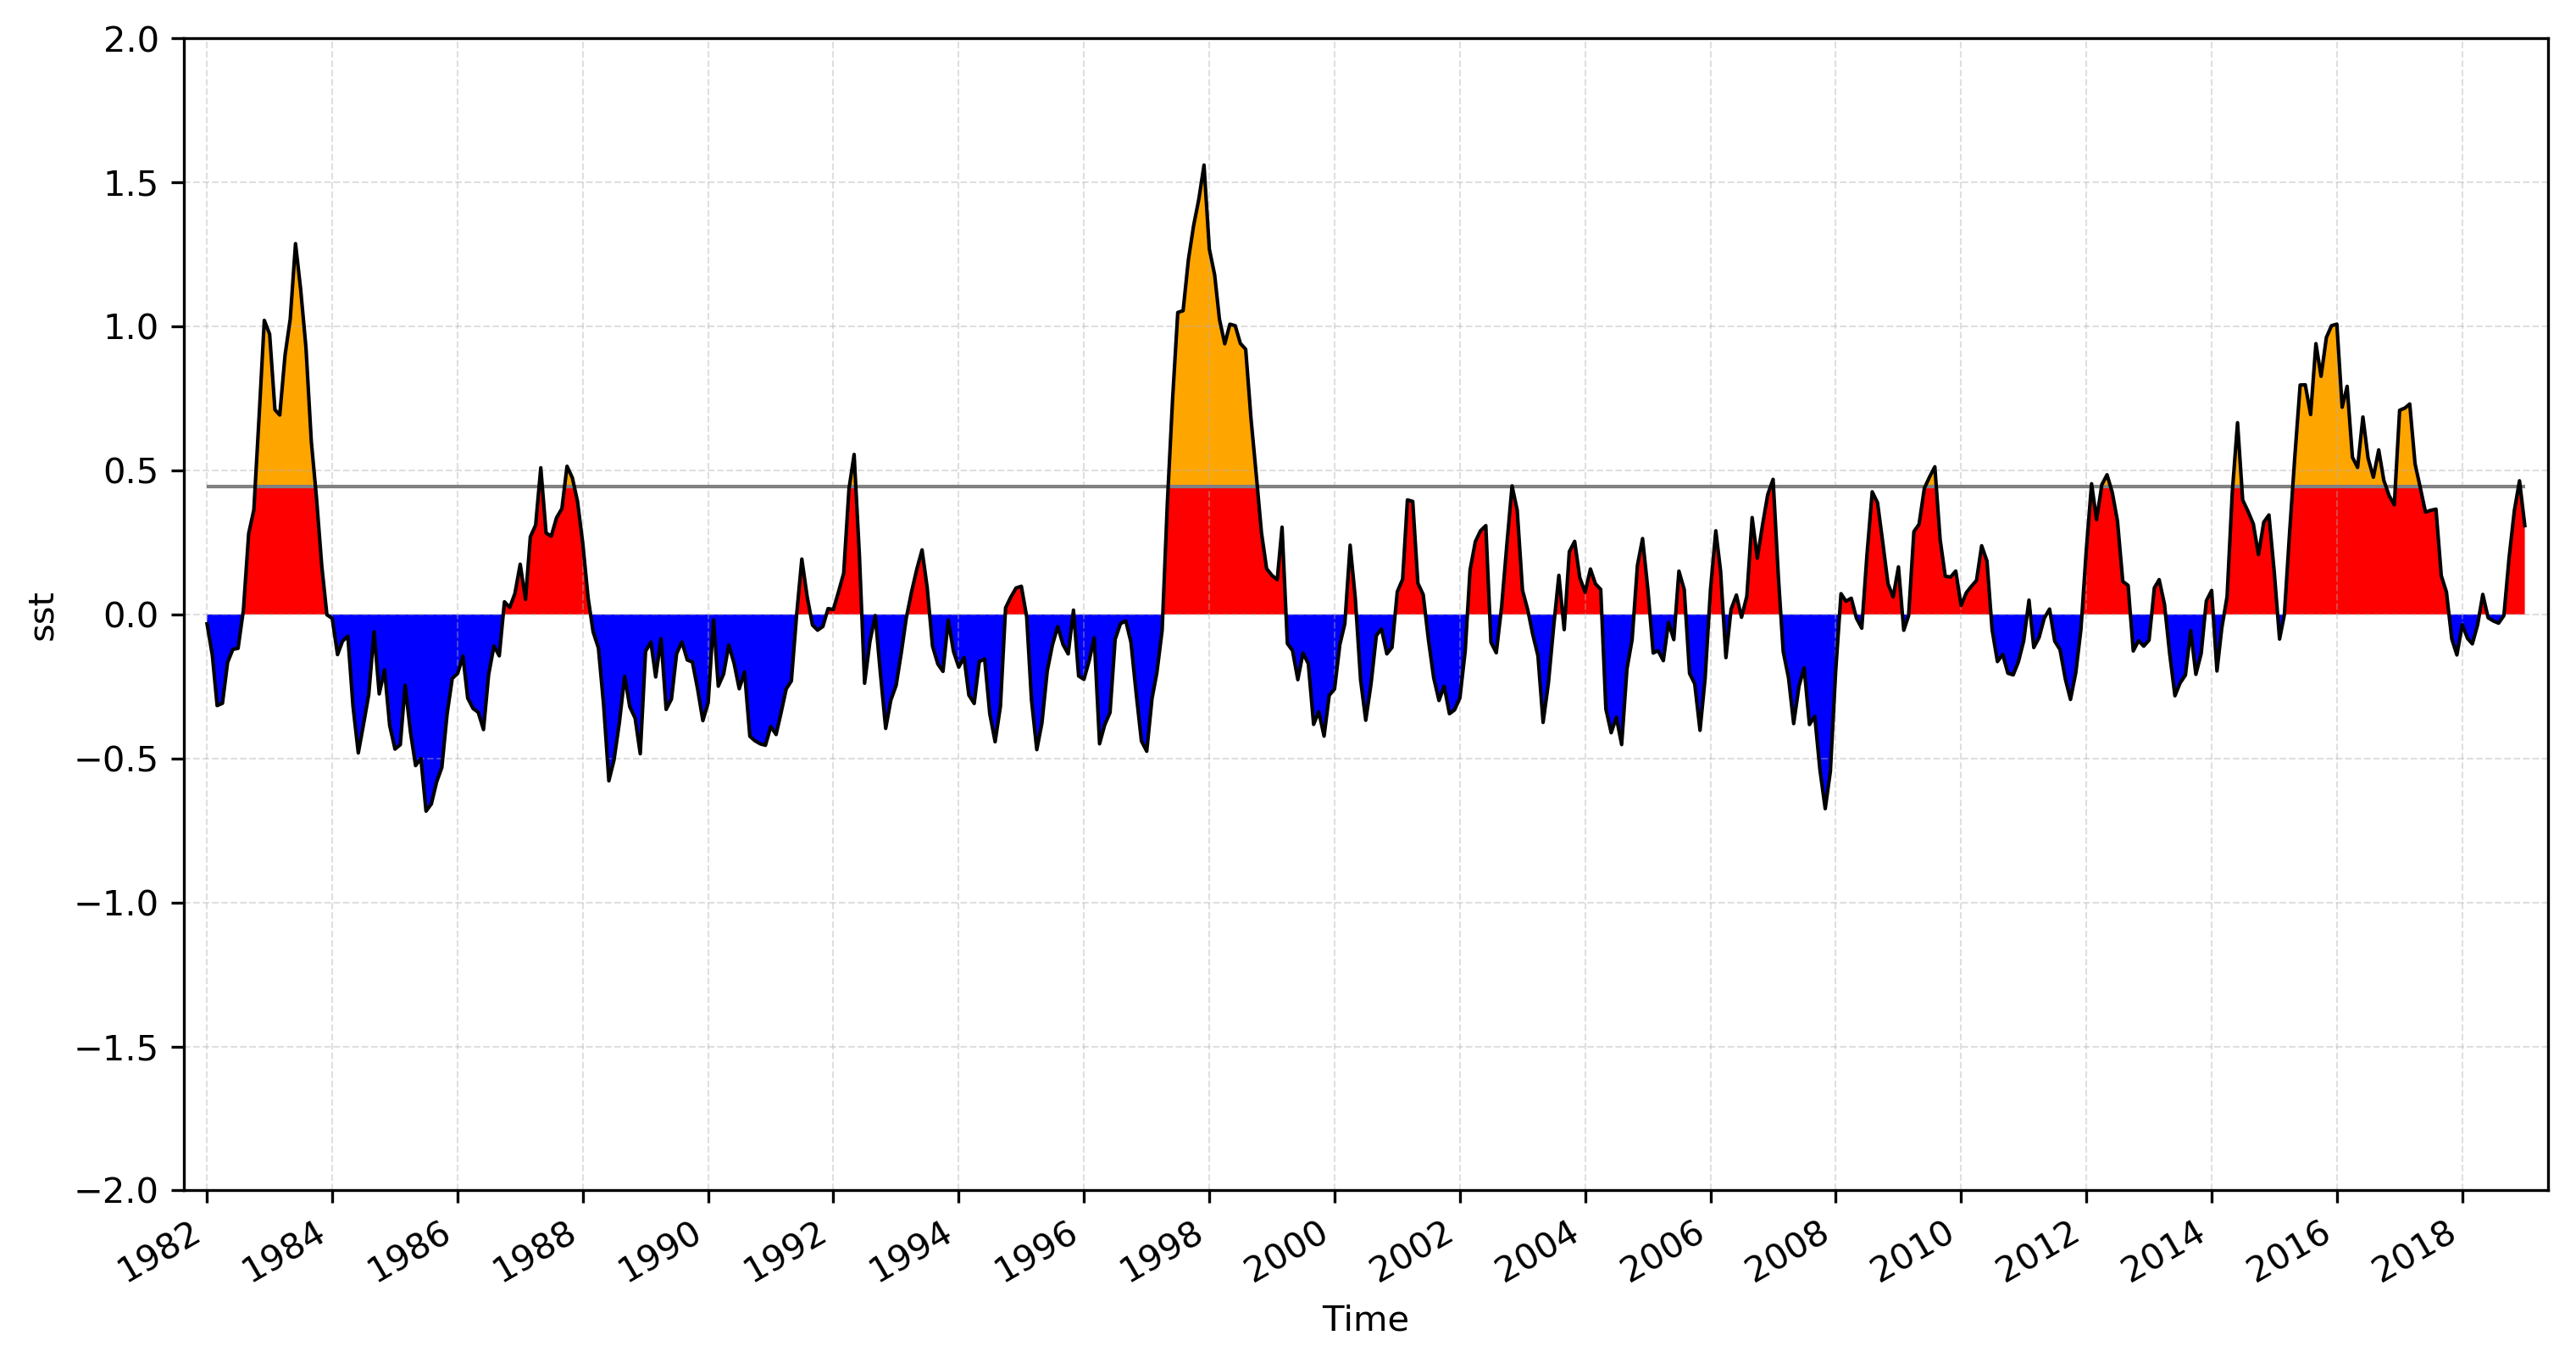

In [557]:
EMI_slice = EMI.sel(time=slice('1982-01-01','2019-12-31'))
std_slice = EMI.std()
ymin = -2
ymax = 2
# plot
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data>=0,facecolor='red',interpolate=True)
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data<=0,facecolor='blue',interpolate=True)
EMI_slice.plot(ax=ax,c='k',lw=1)

ax.hlines(std_slice.data,EMI_slice.time.data.min(),EMI_slice.time.data.max(),color='grey',lw=1,label='Nino4 std')
ax.fill_between(EMI_slice.time.data,EMI_slice.data,std_slice.data,where=EMI_slice.data>=std_slice.data,facecolor='orange',interpolate=True)

# Ax setup
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)
# Ax lims
ax.set_ylim(ymin,ymax)
ax.set_yticks(np.arange(ymin,ymax+0.1,0.5))
ax.margins(0.01,0.1)
ax.grid(True,ls='--',lw=0.5,alpha=0.4)

In [558]:
std_slice

<xarray.DataArray 'sst' ()>
array(0.443907)

## E and C indices

In [502]:
def fix_lon(ds):
    attrs = ds.longitude.attrs
    ds['longitude'] = np.where(ds.longitude<0, ds.longitude+360, ds.longitude)
    ds = ds.sortby('longitude')
    ds.longitude.attrs = attrs
    return ds

def plot_(var):
    if type(var) is list:
        levels=np.arange(-4,4.1,0.5)
        fig, ax = plt.subplots(nrows=len(var),ncols=1,figsize=(14,10),dpi=300,sharex=True)
        for arg, axs in zip(var,ax.flat):
            pl=arg.plot.contourf(ax=axs,levels=levels,add_colorbar=False,cmap=plt.get_cmap('RdBu_r'))
            CS = arg.plot.contour(ax=axs,levels=levels, colors='k')
            axs.clabel(CS, CS.levels, inline=True, fontsize=10)
        fig.colorbar(pl, orientation='horizontal',ax=ax)
    else:
        fig, ax = plt.subplots(figsize=(14,3),dpi=300)
        var1.plot.contourf(ax=ax,levels=13)
        CS = var1.plot.contour(ax=ax,levels=13, colors='k')
        ax.clabel(CS, CS.levels, inline=True, fontsize=10)


In [490]:
orig_data = xr.open_dataset('../Data/HadISST_sst.nc').sst
orig_data = fix_lon(orig_data).sel(latitude=slice(10,-10),longitude=slice(110,290))
print(orig_data)
base_period = orig_data.sel(time=slice('1979-01-01','2009-12-31'))
base_clim = base_period.groupby('time.month').mean(dim='time')
anom = orig_data.groupby('time.month') - base_clim
region_proj = anom.sel(time=slice('1870-01-01','2019-12-31'))

<xarray.DataArray 'sst' (time: 1788, latitude: 20, longitude: 180)>
array([[[25.82707 , 26.184341, ..., 26.18621 ,       nan],
        [25.9986  , 26.339996, ...,       nan,       nan],
        ...,
        [27.887543, 28.020031, ...,       nan,       nan],
        [28.05438 , 28.1946  , ...,       nan,       nan]],

       [[25.93169 , 26.248325, ..., 25.782337,       nan],
        [26.086334, 26.359848, ...,       nan,       nan],
        ...,
        [27.445232, 27.723303, ...,       nan,       nan],
        [27.590145, 27.855421, ...,       nan,       nan]],

       ...,

       [[28.292463, 28.502396, ..., 28.153925,       nan],
        [28.473515, 28.642426, ...,       nan,       nan],
        ...,
        [27.937473, 27.969755, ...,       nan,       nan],
        [27.755957, 27.794998, ...,       nan,       nan]],

       [[27.242012, 27.600513, ..., 27.290596,       nan],
        [27.4641  , 27.813997, ...,       nan,       nan],
        ...,
        [28.16363 , 28.223904, ...,

/home/grivera/miniconda3/envs/Work/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [548]:
o_solver.varianceFraction()[:5]*100

<xarray.DataArray 'variance_fractions' (mode: 5)>
array([67.73448 , 13.667006,  3.54035 ,  2.331712,  1.984668], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3 4

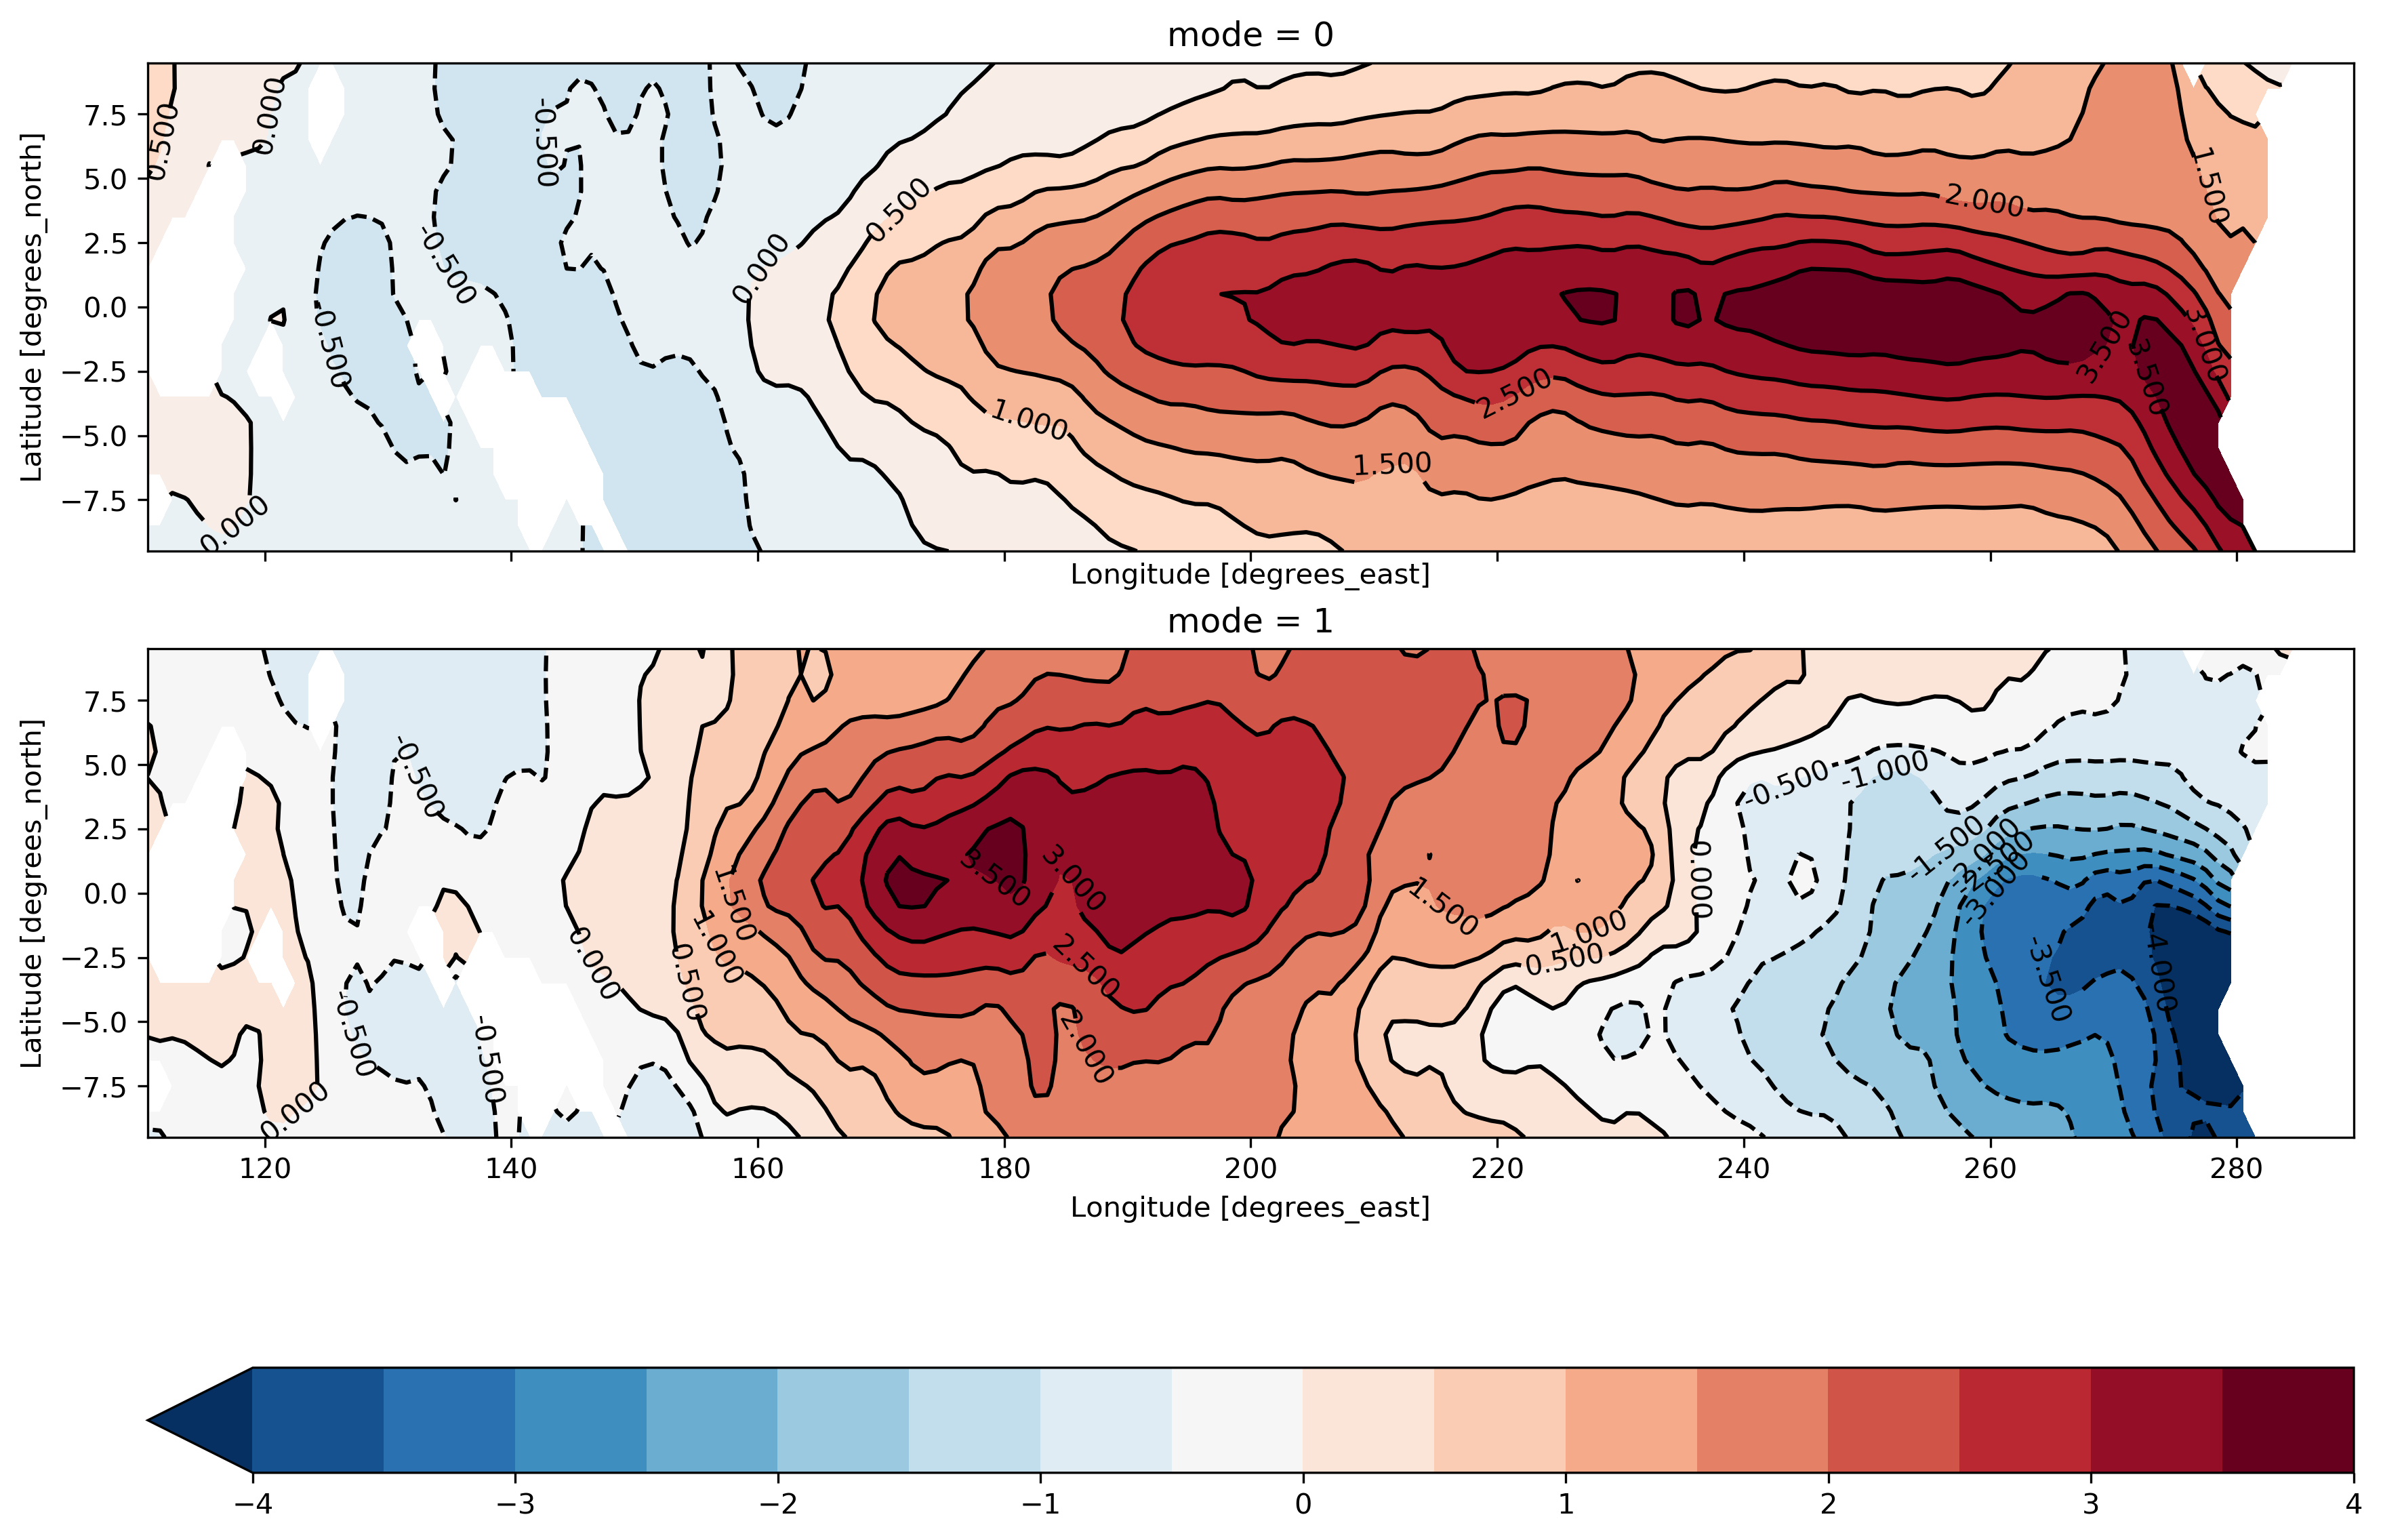

In [503]:
o_solver = Eof(anom.sel(time=slice('1979-01-01','2009-12-31')))
eofs = o_solver.eofs(neofs=2)
plot_([eofs[0]*100,eofs[1]*-100])

In [423]:
new_base = new_data.sel(time=slice('1979-01-01','2009-12-31'))
new_base['longitude'] = np.where(new_base.longitude<0, new_base.longitude+360, new_base.longitude)
new_base = new_base.sortby('longitude')
new_base.longitude.attrs = new_data.longitude.attrs
new_base = new_base.sel(latitude=slice(10,-10),longitude=slice(110,290))
new_clim = new_base.groupby('time.month').mean(dim='time')
new_anom = new_base.sel(latitude=slice(10,-10),longitude=slice(110,290)).groupby('time.month') - new_clim
new_region = new_anom.sel(time=slice('1870-01-01','2019-12-31'))

/home/grivera/miniconda3/envs/Work/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<a list of 7 text.Text objects>

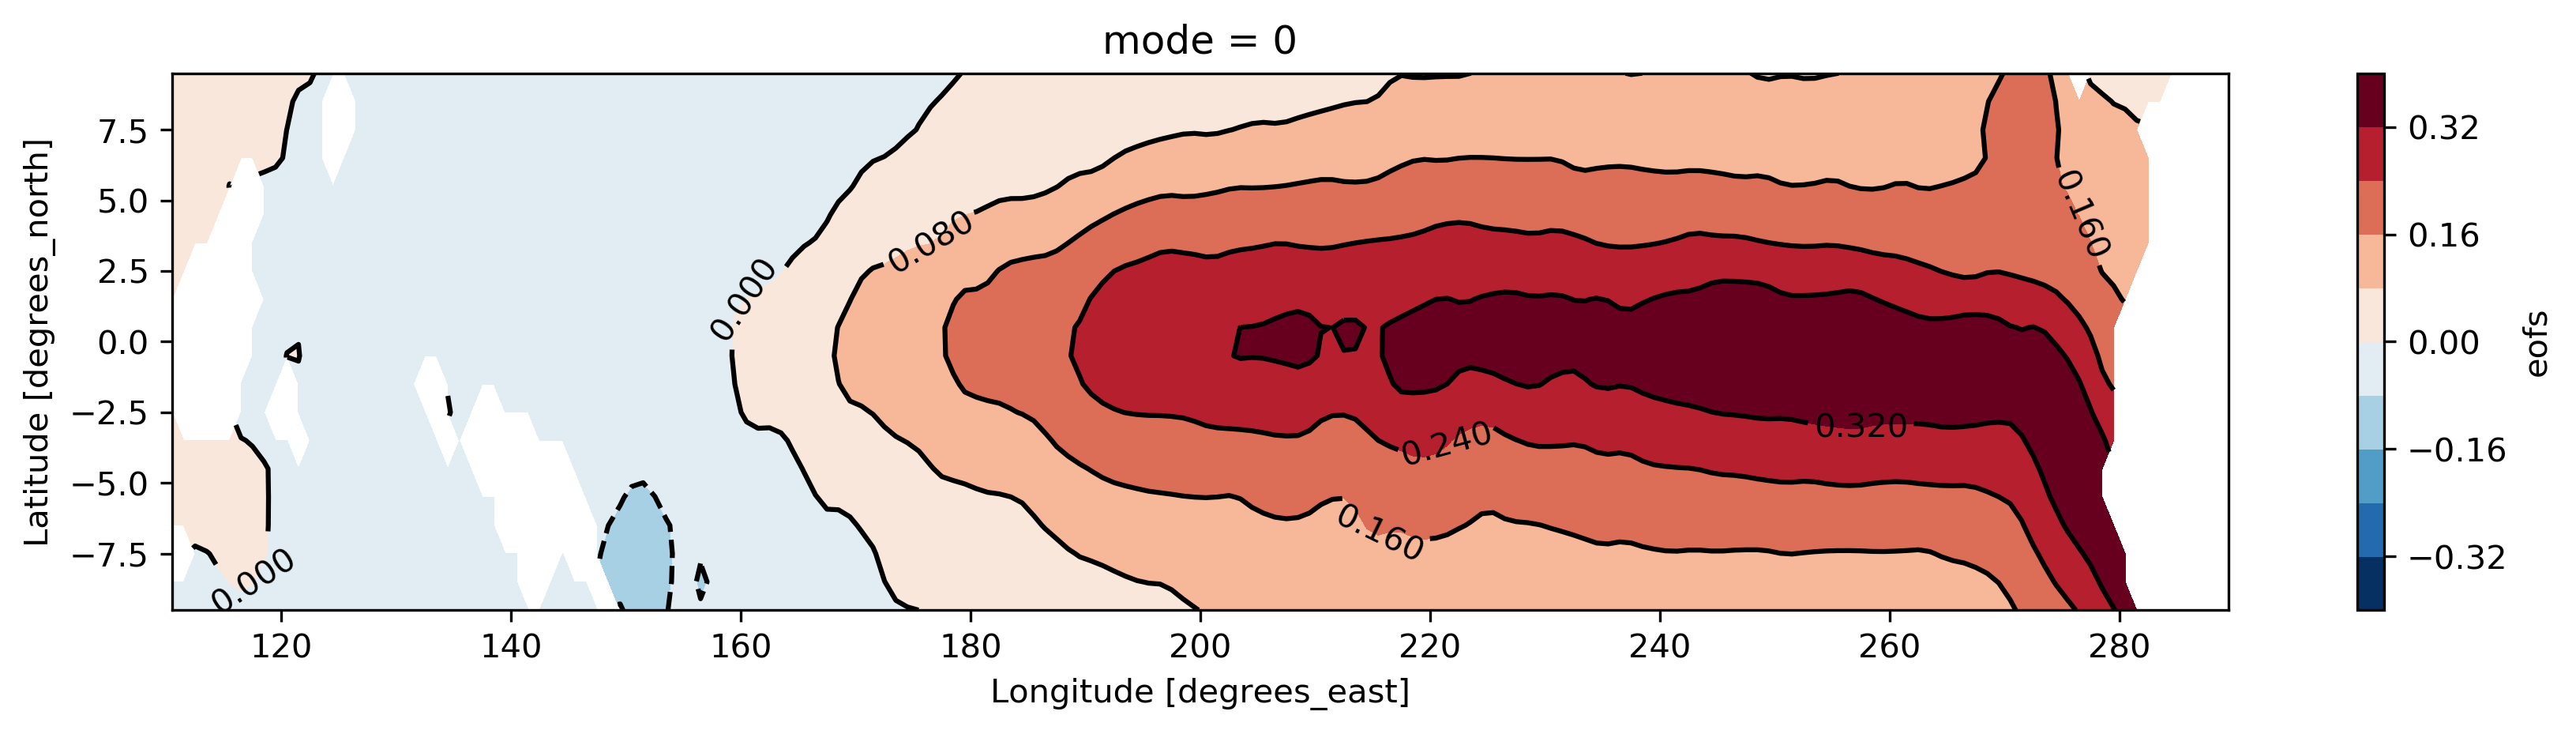

In [438]:
# pc1.plot()
var = eofs[0]*10
fig, ax = plt.subplots(figsize=(14,3),dpi=300)
# ax.pcolormesh(eofs[1].data, cmap=plt.get_cmap('RdBu_r'))#.plot(ax=ax)
# (eofs[1]*10).plot(ax=ax,levels=13)
(var).plot.contourf(ax=ax,levels=13)
CS = (var).plot.contour(ax=ax,levels=13, colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)


In [222]:
base_period = open_data.sel(time=slice('1979-01-01','2009-12-31'))
base_clim = base_period.groupby('time.month').mean(dim='time')
ec_anom = open_data.groupby('time.month') - base_clim
ec_region = ec_anom.sel(lat=slice(10,-10),lon=slice(110,290), time=slice('1870-01-01','2019-12-31'))

/home/grivera/miniconda3/envs/Work/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [223]:
base_clim.sel(lat=slice(10,-10),lon=slice(110,290)).std()

<xarray.DataArray 'sst' ()>
array(1.804081)

In [231]:
base_arr = ec_anom.sel(lat=slice(10,-10),lon=slice(110,290), time=slice('1979-01-01','2009-12-31'))
base_arr

<xarray.DataArray 'sst' (time: 372, lat: 11, lon: 91)>
array([[[ 0.443602,  0.329365, ...,       nan,       nan],
        [ 0.359438,  0.249807, ...,       nan,       nan],
        ...,
        [-0.202951, -0.208979, ...,       nan,       nan],
        [-0.424313, -0.48077 , ...,       nan,       nan]],

       [[ 0.621799,  0.581455, ...,       nan,       nan],
        [ 0.569065,  0.521385, ...,       nan,       nan],
        ...,
        [ 0.037777,  0.034086, ...,       nan,       nan],
        [-0.160736, -0.174141, ...,       nan,       nan]],

       ...,

       [[ 0.091007,  0.068813, ...,       nan,       nan],
        [ 0.109417,  0.080618, ...,       nan,       nan],
        ...,
        [ 0.326681,  0.338081, ...,       nan,       nan],
        [ 0.353277,  0.408024, ...,       nan,       nan]],

       [[ 0.029907,  0.019213, ...,       nan,       nan],
        [ 0.00453 , -0.036287, ...,       nan,       nan],
        ...,
        [ 0.316093,  0.319313, ...,       nan,  

In [345]:
eofs[1].std().data

array(0.02923303)

In [290]:
from eofs.xarray import Eof
solver = Eof(base_period.sel(lat=slice(10,-10),lon=slice(110,290)))
eofs = solver.eofs(neofs=2)
pcs = solver.pcs(npcs=2)

In [291]:
solver.varianceFraction()

<xarray.DataArray 'variance_fractions' (mode: 372)>
array([5.988456e-01, 2.153344e-01, 6.003590e-02, ..., 1.589570e-16,
       1.571609e-16, 1.510385e-16], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 ... 364 365 366 367 368 369 370 371
Attributes:
    long_name:  variance_fractions

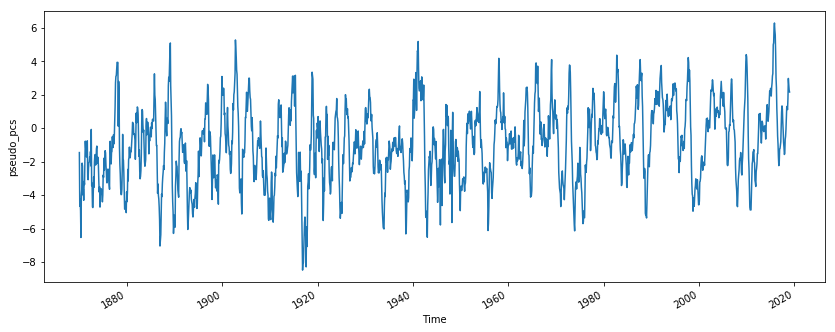

In [346]:
projection = solver.projectField(ec_region,neofs=2)
((projection[:,0]*10/228.22 +projection[:,1]*10/29.233)/(np.sqrt(2))).plot(figsize=(14,5))

In [332]:
((projection[:,0]*10/228.22 +projection[:,1]*10/29.233)/(np.sqrt(2)))[-10:]

<xarray.DataArray 'pseudo_pcs' (time: 10)>
array([0.071295, 0.477715, 0.819449, 0.735723, 0.699536, 1.057118, 1.691225,
       1.445145, 1.21381 , 1.16458 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-04-01 2018-05-01 ... 2019-01-01
    month    (time) int64 4 5 6 7 8 9 10 11 12 1

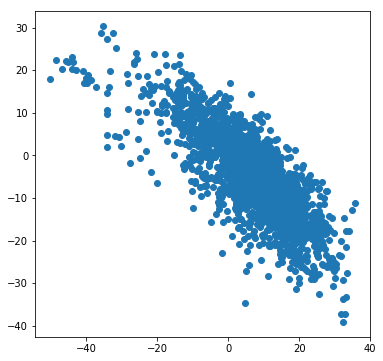

In [279]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(projection[:,0].data,projection[:,1].data)

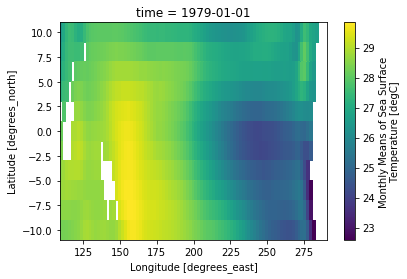

In [296]:
base_period.sel(lat=slice(10,-10),lon=slice(110,290))[0].plot()

In [281]:
(projection[:,0]+projection[:,1])/(np.sqrt(2))

<xarray.DataArray 'pseudo_pcs' (time: 1789)>
array([ 7.30674 , -5.846924, -8.060676, ...,  2.284589,  0.488067,  0.920183],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-01 1870-02-01 ... 2019-01-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1

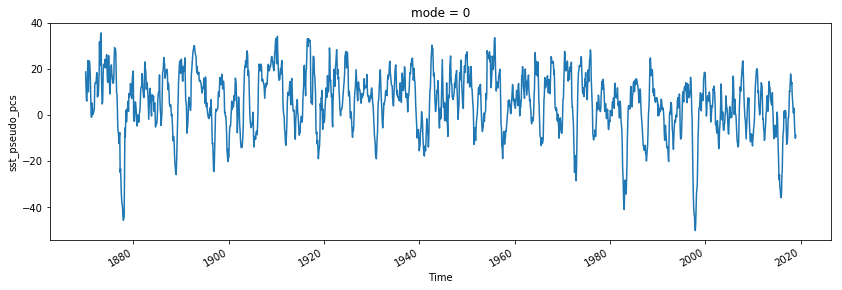

In [282]:
projection[:,0].plot(figsize=(14,4))

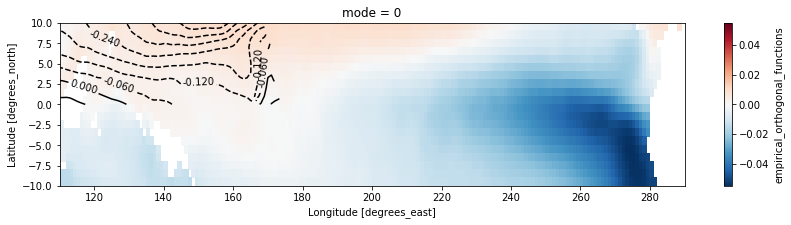

In [360]:
# pc1.plot()
fig, ax = plt.subplots(figsize=(14,3))
# ax.pcolormesh(eofs[1].data, cmap=plt.get_cmap('RdBu_r'))#.plot(ax=ax)
CS = ax.contour(eofs[0].data*10, levels=10, colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
eofs[0].plot(ax=ax)

In [419]:
eof

<xarray.DataArray 'eofs' (mode: 1, lat: 31, lon: 91)>
array([[[          nan,           nan, ...,  1.449812e-03,  1.746947e-03],
        [          nan,           nan, ..., -5.223198e-05,  1.062593e-05],
        ...,
        [ 5.512446e-03,  7.948882e-03, ..., -1.684705e-02,           nan],
        [ 4.759787e-03,  7.115770e-03, ..., -1.482580e-02,           nan]]],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 0
  * lat      (lat) float32 30.0 28.0 26.0 24.0 22.0 ... -24.0 -26.0 -28.0 -30.0
  * lon      (lon) float32 110.0 112.0 114.0 116.0 ... 284.0 286.0 288.0 290.0
Attributes:
    long_name:  empirical_orthogonal_functions

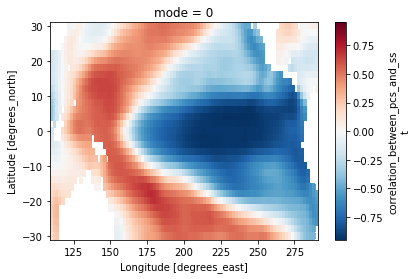

In [217]:
eof1.plot()

In [95]:
from sklearn import preprocessing
from sklearn.decomposition import pca

X = np.reshape(base_arr.data, (base_arr.shape[0],base_arr.lat.size*base_arr.lon.size), order='F')
X = np.ma.masked_array(X,np.isnan(X))
land = X.sum(0).mask
ocean= ~land
X = X[:, ocean]
X

masked_array(
  data=[[0.4436016082763672, 0.3594379425048828, 0.22575950622558594,
         ..., -0.2035541534423828, 0.3998851776123047,
         -0.3223094940185547],
        [0.6217994689941406, 0.5690650939941406, 0.4699821472167969, ...,
         0.1471405029296875, -0.35599517822265625, 0.20697593688964844],
        [0.6711139678955078, 0.5548820495605469, 0.3701648712158203, ...,
         0.08484077453613281, -0.44010162353515625,
         -0.021314620971679688],
        ...,
        [-0.27207374572753906, -0.20619583129882812,
         -0.10821723937988281, ..., 0.894866943359375,
         -0.19139480590820312, 0.4156208038330078],
        [0.09100723266601562, 0.10941696166992188, 0.12570953369140625,
         ..., 0.1938304901123047, 0.6553554534912109,
         0.44921112060546875],
        [0.0299072265625, 0.0045299530029296875, 0.019847869873046875,
         ..., 0.4371490478515625, 0.7040958404541016,
         0.43475914001464844]],
  mask=[[False, False, False, ..., Fa

In [96]:
Y = np.reshape(ec_region.data, (ec_region.shape[0],ec_region.lat.size*ec_region.lon.size), order='F')
Y = np.ma.masked_array(Y,np.isnan(Y))
land1 = Y.sum(0).mask
ocean1= ~land1
Y = Y[:, ocean1]
Y

masked_array(
  data=[[0.29662513732910156, 0.5037612915039062, 0.6221523284912109,
         ..., -0.09574317932128906, -0.9634761810302734,
         0.36353111267089844],
        [0.7491550445556641, 0.7320098876953125, 0.6312274932861328, ...,
         -0.42777442932128906, -0.3004016876220703, 0.5409927368164062],
        [0.8462696075439453, 0.7886829376220703, 0.65582275390625, ...,
         -0.8282032012939453, -0.3340740203857422, -0.026628494262695312],
        ...,
        [0.16190528869628906, 0.1532917022705078, 0.16147994995117188,
         ..., 1.0599174499511719, 0.3683013916015625,
         0.06117439270019531],
        [0.5450153350830078, 0.4762706756591797, 0.4016551971435547, ...,
         0.7567729949951172, 0.43149566650390625, 0.19266319274902344],
        [0.6426830291748047, 0.5746078491210938, 0.4791240692138672, ...,
         0.6421031951904297, 0.7656650543212891, 0.2592639923095703]],
  mask=[[False, False, False, ..., False, False, False],
        [False, F

In [97]:
scaler = preprocessing.StandardScaler()
scaler_ssta = scaler.fit(X)
X = scaler_ssta.transform(X)
skpca = pca.PCA()
skpca.fit(X)
skpca.explained_variance_ratio_[0:10]

array([0.4604206 , 0.1797299 , 0.13208576, 0.05296838, 0.03555698,
       0.02262389, 0.02124394, 0.01715295, 0.01484195, 0.01129586],
      dtype=float32)

In [113]:
ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.7)[0][0]
ipc

2

In [114]:
PCs = skpca.transform(X)
PCs = PCs[:,:ipc]
EOFs = skpca.components_
EOFs = EOFs[:ipc,:]
EOFs.shape

(2, 927)

In [115]:
EOF_recons = np.ones((ipc,base_arr.lat.size*base_arr.lon.size)) * -999
for i in range(ipc):
    EOF_recons[i,ocean] = EOFs[i,:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (ipc, base_arr.lat.size,base_arr.lon.size), order='F'), -999.)
EOF_recons *= 100

In [116]:
PCs2 = skpca.transform(Y)
PCs2 = PCs2[:,:ipc]
EOFs2 = skpca.components_
EOFs2 = EOFs2[:ipc,:]
EOFs2.shape

(2, 927)

In [ ]:
EOF_recons2 = np.ones((ipc,base_arr.lat.size*base_arr.lon.size)) * -999
for i in range(ipc):
    EOF_recons2[i,ocean] = EOFs[i,:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (ipc, base_arr.lat.size,base_arr.lon.size), order='F'), -999.)
EOF_recons *= 100

In [102]:
result = xr.DataArray(EOF_recons,coords=[range(ipc),base_arr.lat,base_arr.lon], dims=['EOF','lat','lon'])
result

<xarray.DataArray (EOF: 2, lat: 11, lon: 91)>
array([[[ 1.290439,  0.965292, ...,       nan,       nan],
        [ 1.525235,  1.125672, ...,       nan,       nan],
        ...,
        [ 0.154847,  0.195241, ...,       nan,       nan],
        [-0.025638, -0.002587, ...,       nan,       nan]],

       [[ 0.443187,  0.361877, ...,       nan,       nan],
        [ 0.455928,  0.279194, ...,       nan,       nan],
        ...,
        [-0.481139, -0.524454, ...,       nan,       nan],
        [-0.332001, -0.34542 , ...,       nan,       nan]]])
Coordinates:
  * EOF      (EOF) int64 0 1
  * lat      (lat) float32 10.0 8.0 6.0 4.0 2.0 0.0 -2.0 -4.0 -6.0 -8.0 -10.0
  * lon      (lon) float32 110.0 112.0 114.0 116.0 ... 284.0 286.0 288.0 290.0

In [107]:
PCs.shape

(372, 2)

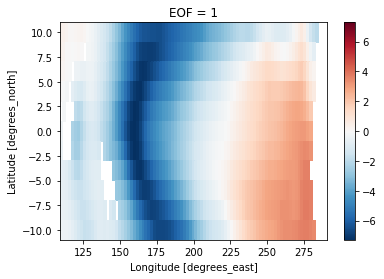

In [105]:
result[1].plot()